<a href="https://colab.research.google.com/github/dustoff06/EcoMod/blob/Day-2-Files/Day_2_Morning_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#pip install notebook

# Lasso, Ridge, ElasticNet, Stepwise, and Best Subsets.

# Advanced Regression Techniques
**Lasso, Ridge, Elastic Net, and Best Subset Models**  
Larry

## Overview
Brief introduction to advanced regression techniques used to improve model performance and interpretability.

## Lasso Regression
**Definition:** Lasso (Least Absolute Shrinkage and Selection Operator) is a regression method that involves a penalty equivalent to the absolute value of the magnitude of coefficients.

**Equation:**  
$$ \min_{\beta} \left\{ \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\} $$

**Explanation:** Lasso shrinks some coefficients to zero, effectively selecting a simpler model that performs feature selection.

## Ridge Regression
**Definition:** Ridge regression addresses multicollinearity by adding a penalty equivalent to the square of the magnitude of coefficients.

**Equation:**  
$$ \min_{\beta} \left\{ \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\} $$

**Explanation:** Ridge does not set coefficients to zero but rather shrinks them, reducing their impact and stabilizing the model.

## Elastic Net Regression
**Definition:** Elastic Net combines penalties of Lasso and Ridge to retain their benefits.

**Equation:**  
$$ \min_{\beta} \left\{ \frac{1}{2n} \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2 \right\} $$

**Explanation:** Elastic Net is particularly useful when there are multiple correlated features.

## Best Subset Selection
**Definition:** Best subset selection involves finding the best subset of predictors that gives the best fit to the data.

**Process:**  
1. Fit all models that contain k predictors, for k = 1, 2, ..., p.
2. Select the best model using criteria such as AIC, BIC, or adjusted $ R^2 $.

**Explanation:** It is computationally expensive and feasible only for a small number of predictors.

## Stepwise Selection
**Definition:** Stepwise selection is an iterative method for selecting variables to be included in a regression model.

**Process:**  
- **Forward Stepwise Selection:** Start with no variables and add one variable at a time based on improvement of a metric (e.g., AIC, adjusted $R^2$ ).
- **Backward Stepwise Selection:** Start with all variables and remove one variable at a time based on the least contribution.
- **Bidirectional Elimination:** A combination of forward and backward selection.

**Explanation:** Stepwise selection reduces the number of models to be evaluated compared to best subset selection.

## Comparison of Lasso, Ridge, Elastic Net, and Best Subset
- **Lasso:** Performs feature selection, may drop some variables.
- **Ridge:** Reduces coefficient size, does not perform feature selection.
- **Elastic Net:** Combines Lasso and Ridge, handles correlated features.
- **Best Subset:** Examines all possible models, computationally intensive.

## Practical Considerations
- **Choosing $ \lambda $ (lambda):** Cross-validation is commonly used to find the optimal value of the regularization parameter.
- **Scalability:** Ridge and Elastic Net are scalable for large datasets, while Best Subset is not.
- **Use Cases:** Application examples for each method based on data characteristics.

## Application Example
**Dataset:** FRED data



# Examples

In [41]:
#!pip install fredapi
import pandas as pd
import numpy as np
from fredapi import Fred
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import combinations
fred = Fred(api_key='2e0d26bb120e8b4acc4096fa26a5222a')


# Analysis


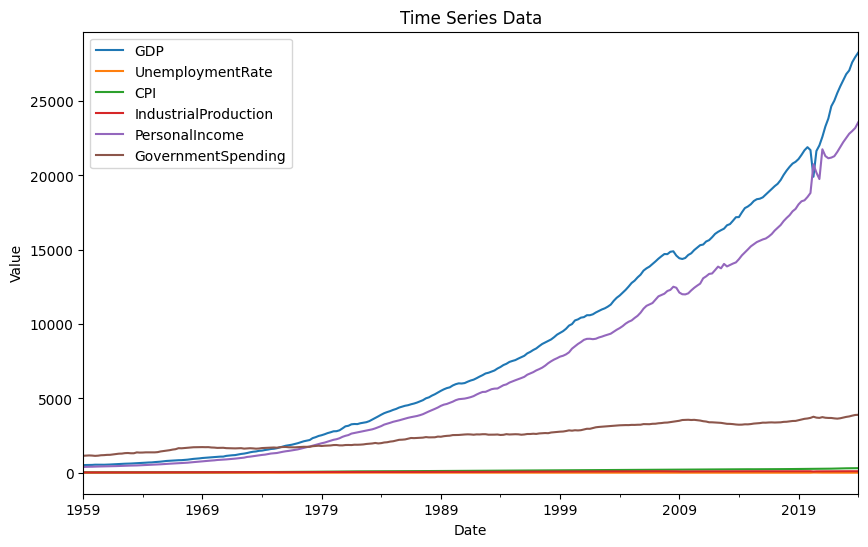

In [42]:
# Retrieve data from FRED
gdp = fred.get_series('GDP')
unemployment_rate = fred.get_series('UNRATE')
consumer_price_index = fred.get_series('CPIAUCSL')
industrial_production = fred.get_series('INDPRO')
personal_income = fred.get_series('PI')
government_spending = fred.get_series('GCEC1')

# Combine data into a DataFrame
data = pd.DataFrame({
    'GDP': gdp,
    'UnemploymentRate': unemployment_rate,
    'CPI': consumer_price_index,
    'IndustrialProduction': industrial_production,
    'PersonalIncome': personal_income,
    'GovernmentSpending': government_spending
}).dropna()

data.plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Transformations & DataFrame

We will not offset.  This analysis is descriptive only.

In [43]:
# Log transformation to stabilize variance (optional)
data['log_GDP'] = data['GDP'].apply(lambda x: np.log(x))
data['log_CPI'] = data['CPI'].apply(lambda x: np.log(x))
data['log_IndustrialProduction'] = data['IndustrialProduction'].apply(lambda x: np.log(x))
data['log_PersonalIncome'] = data['PersonalIncome'].apply(lambda x: np.log(x))
data['log_GovernmentSpending'] = data['GovernmentSpending'].apply(lambda x: np.log(x))

# Prepare features and target variable
X = data[['UnemploymentRate', 'log_CPI', 'log_IndustrialProduction', 'log_PersonalIncome', 'log_GovernmentSpending']]
y = data['log_GDP']

# Train Test Split & Scaler

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = X.iloc[0:209,], X.iloc[210:261,], y[0:209], y[210:261]

# Standardize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize & Fit Regularized Regression Models

In [45]:
# Initialize models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit models
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)


ElasticNet(alpha=0.1)

# Predict & Evaluate

In [46]:
# Predict
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_elastic_net = elastic_net.predict(X_test_scaled)

# Round
def myround(a): return(np.round(a, 3))


# Evaluate models
def eval(observed, expected):
    me=(observed-expected).mean()
    mpe=((observed-expected)/observed).mean()
    rmse =(((observed-expected)**2).mean())**.5
    mae=np.abs(observed-expected).mean()
    mape=((observed-expected)/observed).mean()
    r2 = r2_score(observed, expected)

    return myround(me), myround(mpe), myround(rmse), myround(mae), myround(mape), myround(r2)

las=eval(y_test, y_pred_lasso)
rid=eval(y_test, y_pred_ridge)
elas=eval(y_test, y_pred_elastic_net )
tot=[las,rid,elas]
tot=pd.DataFrame(tot, columns=['me','mpe','rmse','mae','mape','r2'])
tot.index=['Lasso','Ridge','ElasticNet']
tot



,me,mpe,rmse,mae,mape,r2
Lasso,0.580,0.058,0.584,0.580,0.058,-11.093
Ridge,0.121,0.012,0.139,0.124,0.012,0.320
ElasticNet,0.519,0.052,0.523,0.519,0.052,-8.702


# Stepwise

In [47]:
# Stepwise Selection using statsmodels
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature:30} with p-value {best_pval:.6}')

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature:30} with p-value {worst_pval:.6}')
        if not changed:
            break
    return included

result = stepwise_selection(X_train, y_train)

print(f'Selected features: {result}')

# Fit the final model with selected features
final_model = sm.OLS(y_train, sm.add_constant(X_train[result])).fit()
y_pred_stepwise = final_model.predict(sm.add_constant(X_test[result]))

# Evaluate the stepwise model
step=eval(y_test, y_pred_stepwise)
tot.loc['Stepwise']=step
tot

Add  log_PersonalIncome             with p-value 0.0
Add  UnemploymentRate               with p-value 2.16914e-06
Add  log_GovernmentSpending         with p-value 0.00973022
Selected features: ['log_PersonalIncome', 'UnemploymentRate', 'log_GovernmentSpending']


,me,mpe,rmse,mae,mape,r2
Lasso,0.580,0.058,0.584,0.580,0.058,-11.093
Ridge,0.121,0.012,0.139,0.124,0.012,0.320
ElasticNet,0.519,0.052,0.523,0.519,0.052,-8.702
Stepwise,-0.018,-0.002,0.041,0.021,-0.002,0.942


# Best Subsets

In [48]:
# Best Subset Selection
def best_subset_selection(X, y):
    best_aic = np.inf
    best_model = None
    for k in range(1, len(X.columns) + 1):
        for combo in combinations(X.columns, k):
            model = sm.OLS(y, sm.add_constant(X[list(combo)])).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_model = model
    return best_model

best_model = best_subset_selection(X_train, y_train)
y_pred_best_subset = best_model.predict(sm.add_constant(X_test[best_model.model.exog_names[1:]]))

# Evaluate the best subset model
best=eval(y_test, y_pred_best_subset)
tot.loc['Best_Subsets']=best

tot





,me,mpe,rmse,mae,mape,r2
Lasso,0.580,0.058,0.584,0.580,0.058,-11.093
Ridge,0.121,0.012,0.139,0.124,0.012,0.320
ElasticNet,0.519,0.052,0.523,0.519,0.052,-8.702
Stepwise,-0.018,-0.002,0.041,0.021,-0.002,0.942
Best_Subsets,0.013,0.001,0.033,0.026,0.001,0.960


# Evaluate Standardized Coefficients

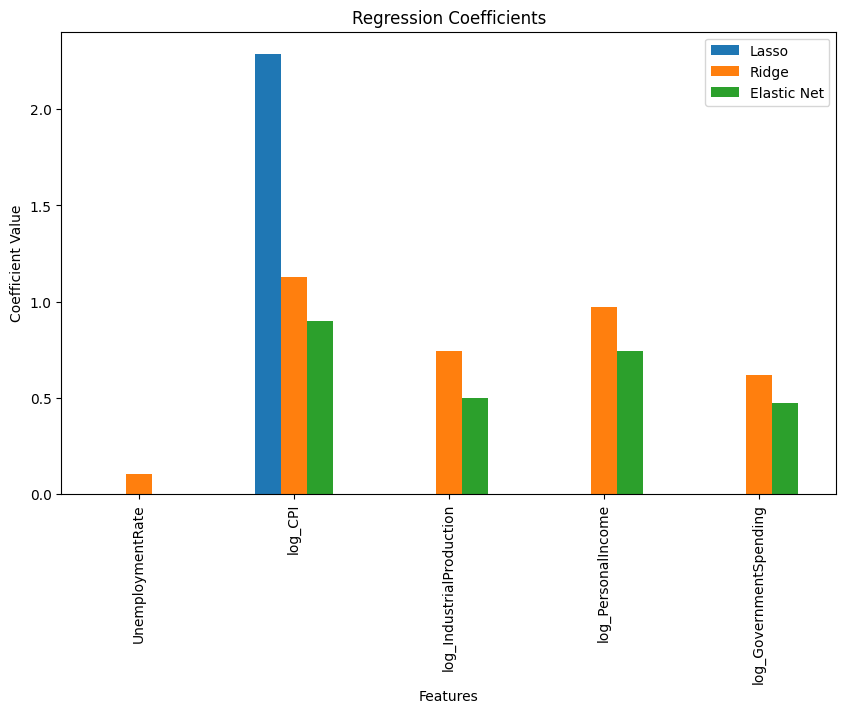

In [49]:
# Plot the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_,
    'Elastic Net': elastic_net.coef_
}).set_index('Feature')

coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

# A Quick Discussion of PCA

In [50]:
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

#Toy Data, Cost ~ # Outpatients + # Inpatients
mydf=pd.DataFrame([[100,1,4],[300,3,7],[100,2,4],[400,4,9]])
mydf.columns=['Cost','Outpatients','Inpatients']
print(mydf)
print(mydf.corr())
print('\n')

#PCA
reduce=PCA()
myred=reduce.fit(mydf.iloc[:,1:3].values)
print("Variance Explained: ", myred.explained_variance_ratio_)
temp=pd.DataFrame(reduce.fit_transform(mydf.iloc[:,1:3].values))
print('\n')
print(temp)
print('\n')

#Save First Component Only
X=pd.DataFrame(temp.iloc[:,0])

#Fit Full Model
myfit=regr.fit(mydf.iloc[:,1:3],mydf.iloc[:,0])
print("R^2 Full: ", myfit.score(mydf.iloc[:,1:3],mydf.iloc[:,0]))
print('\n')
#Fit One Component Model
myfit2=regr.fit(X, mydf.iloc[:,0])
print("R^2 PCA: ",myfit2.score(X, mydf.iloc[:,0]))


   Cost  Outpatients  Inpatients
0   100            1           4
1   300            3           7
2   100            2           4
3   400            4           9
                 Cost  Outpatients  Inpatients
Cost         1.000000     0.946729    0.997940
Outpatients  0.946729     1.000000    0.948683
Inpatients   0.997940     0.948683    1.000000


Variance Explained:  [0.98268703 0.01731297]


          0         1
0 -2.463603 -0.425039
1  1.117989 -0.010071
2 -2.008351  0.465324
3  3.353966 -0.030213


R^2 Full:  0.9958847736625515


R^2 PCA:  0.991318725651688


# A Quick Demonstration of Discretization (Step Functions)

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets
iris= pd.DataFrame(datasets.load_iris().data)
iris.columns = datasets.load_iris().feature_names
iris['type'] = datasets.load_iris().target
iris['type']=iris['type'].astype('object')
iris['new']=(iris.iloc[:,0]*iris.iloc[:,1])/(iris.iloc[:,2]*iris.iloc[:,3])

X=pd.get_dummies(iris,columns=['type'])
X=sm.add_constant(X)

X['y']=iris['petal length (cm)']
X.columns=['const', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'new', 'type0','type1','type2','y']
X['Q1']=np.where(X['sepal_length'] <=5.1, 1, 0)
X['Q2']=(1-X['Q1'])*np.where(X['sepal_length'] <=5.8 , 1, 0)
X['Q3']=(1-X['Q1']-X['Q2'])*np.where(X['sepal_length'] <=6.5 , 1, 0)
X['Q4']=(1-X['Q1']-X['Q2']-X['Q3'])*np.where(X['sepal_length'] <=7.9 , 1, 0)

mod = ols('petal_length~Q1+Q2+Q3+Q4+petal_width', data=X)
res = mod.fit()
print(res.summary())
noconst=X
mod2 = ols('petal_length~Q1+Q2+Q3+Q4+petal_width', data=noconst).fit()
table = sm.stats.anova_lm(mod2)
print(table)


                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     594.5
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           7.98e-89
Time:                        22:49:54   Log-Likelihood:                -83.354
No. Observations:                 150   AIC:                             176.7
Df Residuals:                     145   BIC:                             191.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2846      0.085     15.045      

# And Another Short Discussion of Splines


Splines are another mechanism for introducing nonlinearity.  In a spline, we have indicator variables that break up a variable into separate components, just like we discussed under step functions.  But then, we have another function for each  one of the regions bounded by the step functions.  

For example, we might have a polynomial spline which is indexed by the COVID era (pre / during / after).  Prior to COVID, we fit the occurrence of upper respiratory functions with one polynomial.  During COVID, we fit another polynomial.  After COVID, we fit a third polynomial.  
We might want to smooth the connections which can be done by adding constraints to our model.  (Really, we are building three models and just connecting them, right?)  

One way to do this is add a basis function to our polynomial splines.  Let’s assume we are estimating a model for intelligence and age with knots at age 15 and 55. Then a nice way to make the function smooth is to add a basis function of the form below.

$ y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_1^3 + (X_1 - X_{\text{knot1}})^3 I_{(> \text{knot1})} + (X_1 - X_{\text{knot2}})^3 I_{(> \text{knot2})} + \epsilon $


For each knot that we add, we simply include an additional term: $y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_1^3 + (X_1 - X_{\text{knot1}})^3 I_{(> \text{knot1})} + (X_1 - X_{\text{knot2}})^3 I_{(> \text{knot2})} + (X_1 - X_{\text{knot o}})^3 I_{(> \text{knot o})} + \epsilon $

 These terms literally cube the difference between the observations if the observation is strictly above the knot.   A cubic spline with 4 knots will have the three terms from order 1 to order 3 plus one term for each know.  An example follows using the iris dataset.  Cubic knots at 0 and every quantile are set for sepal length.  Squared and cubic terms are added.


In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
X=pd.get_dummies(iris,columns=['type'])
X=sm.add_constant(X)
X['y']=iris['petal length (cm)']
X.columns=['const', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'new', 'type0','type1','type2','y']
X['Q1']=np.where(X['sepal_length'] <=5.1, 1, 0)
X['Q2']=(1-X['Q1'])*np.where(X['sepal_length'] <=5.8 , 1, 0)
X['Q3']=(1-X['Q1']-X['Q2'])*np.where(X['sepal_length'] <=6.5 , 1, 0)

X['Squared']=X['sepal_length']**2
X['Cubic']=X['sepal_length']**3
X['CubicKnot1']=(X['Q1']*(X['sepal_length']-0))**3
X['CubicKnot2']=(X['Q2']*(X['sepal_length']-5.1))**3
X['CubicKnot3']=(X['Q3']*(X['sepal_length']-5.8))**3
X['CubicKnot4']=(X['Q3']*(X['sepal_length']-6.5))**3

mod = ols('petal_length~sepal_length+Squared+Cubic+CubicKnot1+CubicKnot2+CubicKnot3+CubicKnot4', data=X)
res = mod.fit()
print(res.summary())
noconst=X
mod2 = ols('petal_length~sepal_length+Squared+Cubic+CubicKnot1+CubicKnot2+CubicKnot3+CubicKnot4', data=noconst).fit()
table = sm.stats.anova_lm(mod2)
print(table)


                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     82.76
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           6.07e-47
Time:                        22:49:54   Log-Likelihood:                -175.69
No. Observations:                 150   AIC:                             367.4
Df Residuals:                     142   BIC:                             391.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.2067     20.363      1.483   

# Cross Validation

# Cross-Validation Techniques in Machine Learning

## Overview
Cross-validation is a statistical method used to estimate the performance of machine learning models. It is used to assess how the results of a statistical analysis will generalize to an independent data set. Here, we will cover several types of cross-validation techniques including leave-one-out cross-validation, k-fold cross-validation, and time series cross-validation. Additionally, we will discuss considerations for using cross-validation.

## Leave-One-Out Cross-Validation (LOOCV)
Leave-one-out cross-validation involves using a single observation from the original sample as the validation data, and the remaining observations as the training data. This process is repeated such that each observation in the sample is used once as the validation data.

**Formula:**
If we have $ n $ data points:
$
LOOCV = \frac{1}{n} \sum_{i=1}^{n} L(y_i, \hat{y}_{-i})
$
where $L$ is the loss function, $y_i$ is the true value, and $ \hat{y}_{-i} $ is the prediction obtained when the $i-th$ observation is left out of the training set.

## K-Fold Cross-Validation
K-fold cross-validation involves dividing the dataset into $k$ subsets. For each subset, the model is trained on $k-1$ subsets and validated on the remaining subset. This process is repeated $k$ times, with each of the $k$ subsets used exactly once as the validation data.

**Formula:**
$
KFoldCV = \frac{1}{k} \sum_{i=1}^{k} L(y_i, \hat{y}_{-i})
$
where $L$ is the loss function, $y_i$ is the true value, and $ \hat{y}_{-i} $ is the prediction obtained when the $ith$ fold is used as the validation set.

## Cross-Validation
Cross-validation generally refers to the practice of partitioning data into training and validation sets multiple times, training the model, and validating it to get a sense of how well it generalizes. The term is often used interchangeably with k-fold cross-validation.

## Time Series Cross-Validation
Time series cross-validation is used when the data involves time-dependent observations. In this approach, the model is trained on a window of data and validated on the next observation(s). The window is then moved forward in time, and the process is repeated.

**Diagram:**


**Considerations:** Time series data should not be randomly shuffled during cross-validation to preserve the temporal ordering.

## Considerations for Use of Cross-Validation
1. **Data Leakage**: Ensure that cross-validation is done in a way that prevents information from the validation set from leaking into the training set.
2. **Stratification**: When dealing with classification tasks, ensure that the folds are stratified so that each fold has a representative distribution of the classes.
3. **Compute Efficiency**: Cross-validation, especially LOOCV, can be computationally expensive for large datasets.
4. **Temporal Dependencies**: For time series data, use time series cross-validation to respect the temporal ordering of the data.


TimeSeriesSplit Cross-Validation Results:
Mean MSE: 0.002523995766849446
Mean R2: 0.9274032555216456


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

Rolling Cross-Validation Results:
Mean MSE: 0.00016749838690851854
Mean R2: nan
Test Data Evaluation:
MSE: 0.001217504770333749
R2: 0.9750855220234138


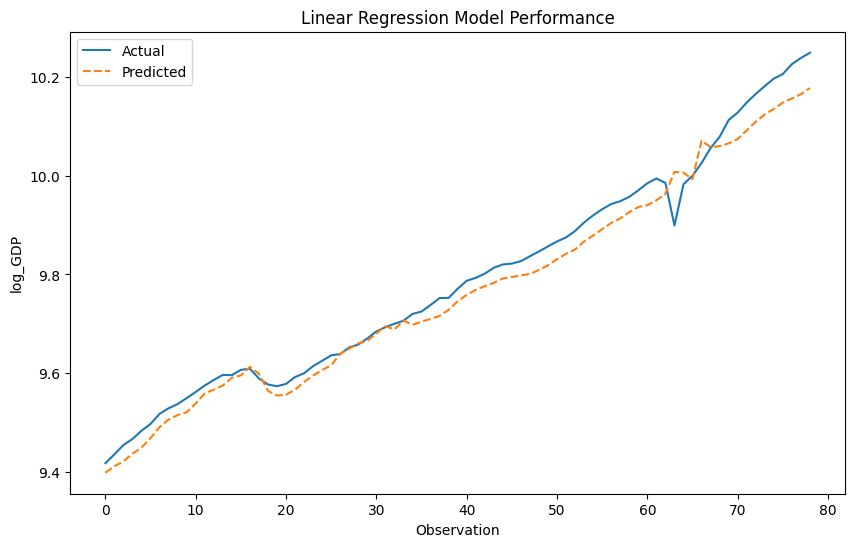

In [64]:
import pandas as pd
import numpy as np
from fredapi import Fred
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Prepare features and target variable
X = data[['UnemploymentRate', 'log_CPI', 'log_IndustrialProduction', 'log_PersonalIncome', 'log_GovernmentSpending']]
y = data['log_GDP']

# Split data into training and testing sets (sequential split)
split_index = int(len(X) * 0.7)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Initialize the regression model
model = LinearRegression()

# TimeSeriesSplit Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
tscv_mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=tscv)
tscv_r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=tscv)

print("TimeSeriesSplit Cross-Validation Results:")
print(f"Mean MSE: {-np.mean(tscv_mse_scores)}")
print(f"Mean R2: {np.mean(tscv_r2_scores)}")

# Leave-One-Out Cross-Validation for time series is not practical due to temporal dependency
# Instead, we'll use a rolling cross-validation approach for illustration
def rolling_cross_val_score(model, X, y, window_size):
    mse_scores = []
    r2_scores = []
    for i in range(window_size, len(X)):
        X_train_rolling = X.iloc[:i]
        y_train_rolling = y.iloc[:i]
        X_test_rolling = X.iloc[i:i+1]
        y_test_rolling = y.iloc[i:i+1]
        model.fit(X_train_rolling, y_train_rolling)
        y_pred_rolling = model.predict(X_test_rolling)
        mse_scores.append(mean_squared_error(y_test_rolling, y_pred_rolling))
        r2_scores.append(r2_score(y_test_rolling, y_pred_rolling))
    return mse_scores, r2_scores

# Rolling Cross-Validation with a window size of 30
rolling_mse_scores, rolling_r2_scores = rolling_cross_val_score(model, X_train, y_train, window_size=30)

print("Rolling Cross-Validation Results:")
print(f"Mean MSE: {np.mean(rolling_mse_scores)}")
print(f"Mean R2: {np.mean(rolling_r2_scores)}")

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Data Evaluation:")
print(f"MSE: {mse}")
print(f"R2: {r2}")

# Plot the performance
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Linear Regression Model Performance')
plt.xlabel('Observation')
plt.ylabel('log_GDP')
plt.legend()
plt.show()
